# Chapter 3: Engineering Optimization

---

**Prerequisites:**
- Python 3.8+
- Qiskit 2.1.2
- See `Chapter02_Software.ipynb` for installation instructions


In [ ]:
# Setup and imports for D-Wave
import numpy as np
import matplotlib.pyplot as plt

from Chapter03_EngineeringOptimization_functions import (truss1x1,truss1x2,truss2x2,truss_10bar,
                                                        PlaneStressOC,
                                                         PlaneStressCantilever)

print('Setup complete!')

Setup complete!


## Pick a truss example

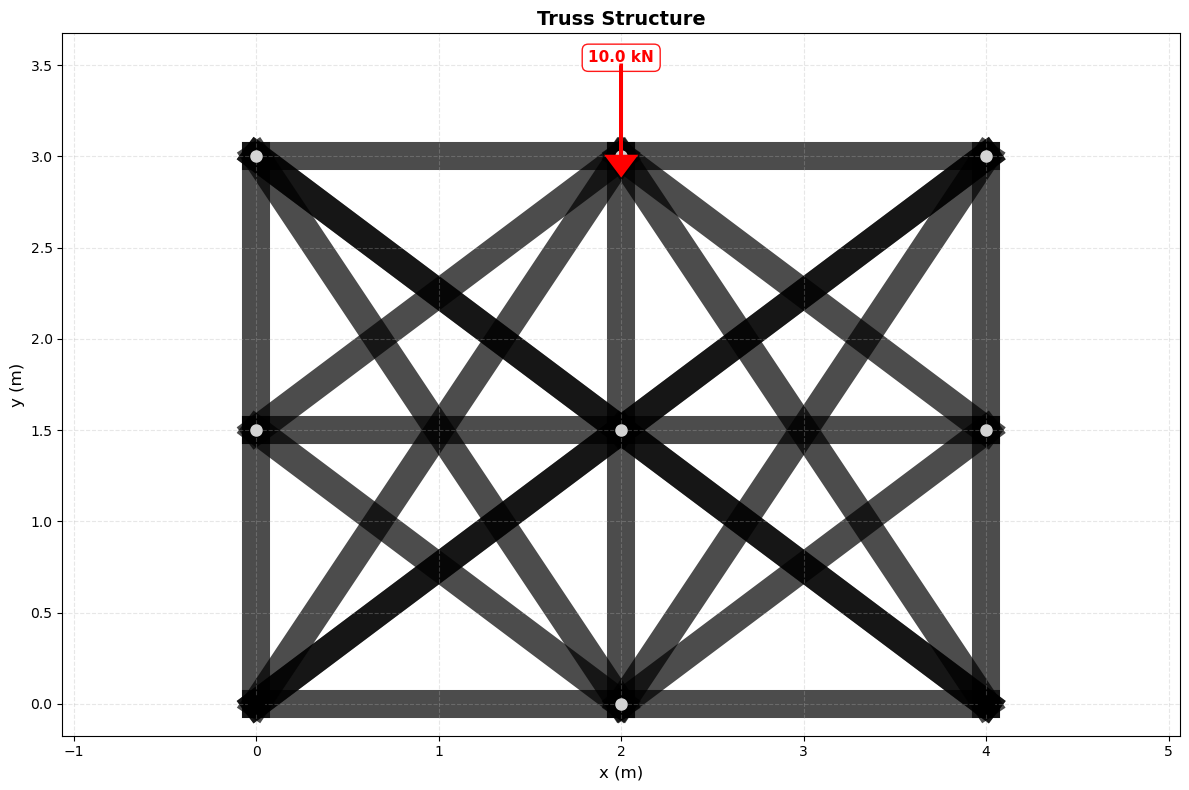

In [8]:
fem_model= truss2x2() 
fem_model.plot_truss()

## Solving and plotting deformed truss

Design valid? True
Max displacement: 1.136e-07 m


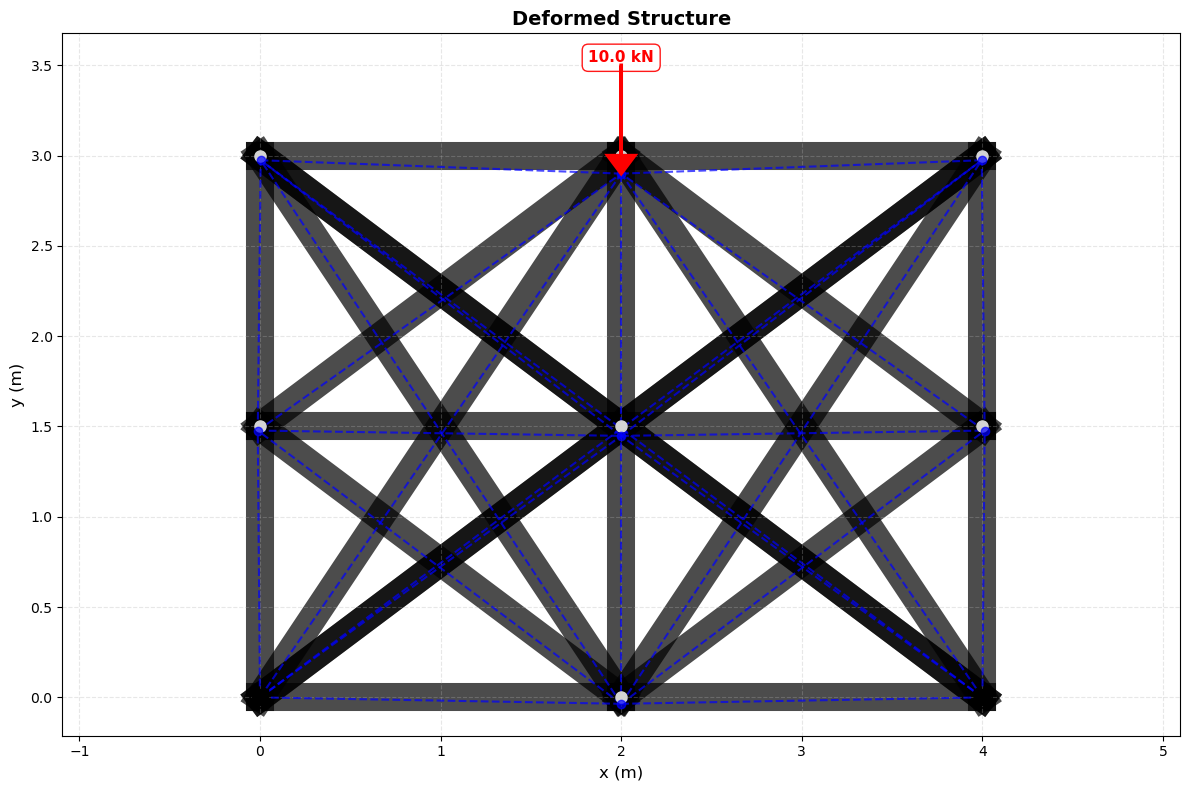

In [9]:
# Solve FEM for full design
d, valid = fem_model.solve()

print(f"Design valid? {valid}")
print(f"Max displacement: {abs(d).max():.3e} m")

# plot deformed truss
fem_model.plot_truss(displacements=d, 
                    title="Deformed Structure")


## Evaluating the metrics

In [10]:
# Design constraints

metrics = fem_model.evaluate_design()
fem_model.print_metrics(metrics)

  Volume: 32.71 m^3
  Max displacement: 1.1362e-04 m
  Max stress: 7.28e-03 Pa
  Compliance: 1.14e-03 J
  Feasible: True


## Optimization truss using 

Starting optimization (Target Volume: 8.1778 m^3)...
Optimization successful.
  Volume: 8.18 m^3
  Max displacement: 1.5856e-04 m
  Max stress: 7.32e-03 Pa
  Compliance: 1.59e-03 J
  Feasible: True


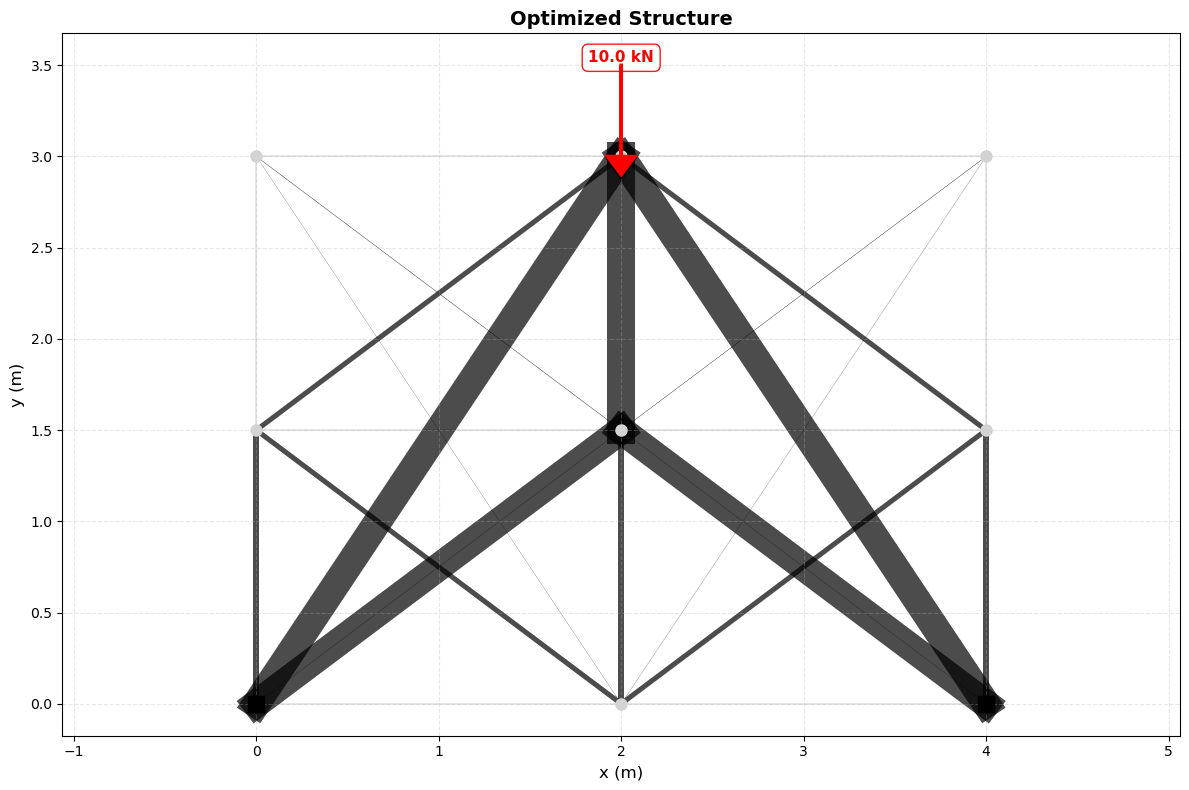

In [13]:
result = fem_model.optimize_areas(volume_fraction = 0.25)

fem_model.A = result.x
metrics = fem_model.evaluate_design()
fem_model.print_metrics(metrics)
fem_model.plot_truss(title="Optimized Structure")

## Plane stress example

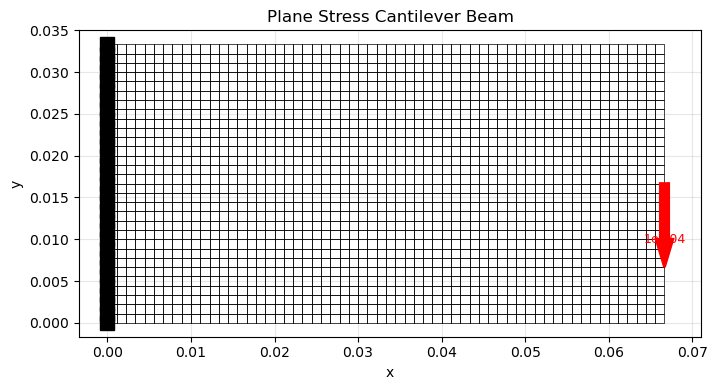

In [7]:

fea2d = PlaneStressCantilever(nx=60, ny=30,)
fea2d.plot_mesh()


## Solve Plane stress

  Compliance: 1.9771e-01
  Volume: 2.2222e-04
  Volume fraction: 1.0000
  Feasible: True


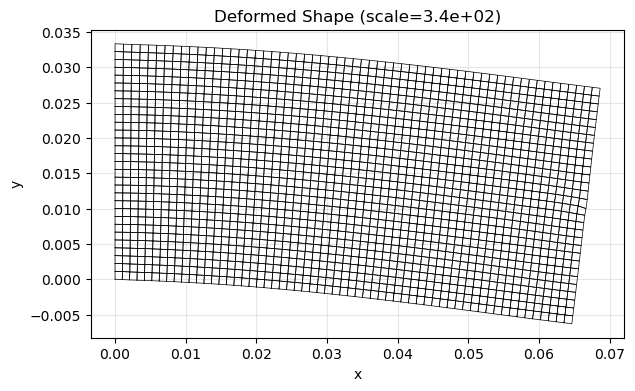

In [8]:

U, valid = fea2d.solve()
metrics = fea2d.evaluate_design()
fea2d.print_metrics(metrics)

fea2d.plot_displacement()

Starting OC Optimization: Target VF=0.5, Filter R=1.5
Iter   0: Compliance=1.582, volume_fraction=0.5000, Change=0.2000
Iter   5: Compliance=0.5171, volume_fraction=0.5000, Change=0.2000
Iter  10: Compliance=0.4091, volume_fraction=0.5002, Change=0.1954
Iter  15: Compliance=0.3463, volume_fraction=0.5000, Change=0.1565
Iter  20: Compliance=0.3344, volume_fraction=0.5000, Change=0.0522
Iter  25: Compliance=0.3337, volume_fraction=0.5000, Change=0.0320
Iter  30: Compliance=0.3333, volume_fraction=0.5000, Change=0.0212
Iter  35: Compliance=0.3331, volume_fraction=0.5001, Change=0.0159
Iter  40: Compliance=0.3331, volume_fraction=0.5000, Change=0.0121
Iter  45: Compliance=0.3329, volume_fraction=0.5001, Change=0.0139
Iter  50: Compliance=0.333, volume_fraction=0.5000, Change=0.0149
Iter  55: Compliance=0.3328, volume_fraction=0.5001, Change=0.0114
Iter  60: Compliance=0.3329, volume_fraction=0.4999, Change=0.0114
Iter  65: Compliance=0.3329, volume_fraction=0.4999, Change=0.0105
Iter  70: 

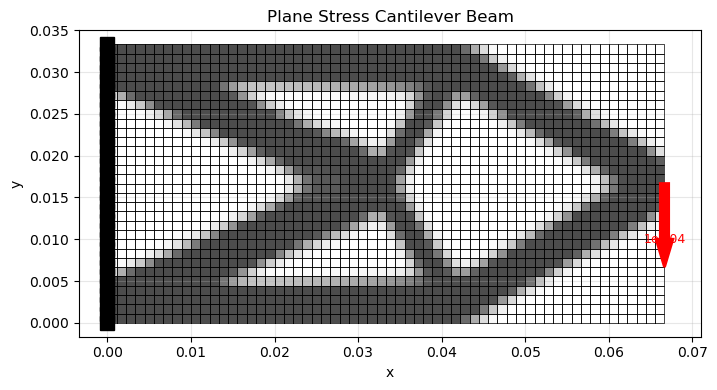

In [9]:
## Optimize 2D structure
toOC = PlaneStressOC(fea2d, volume_fraction = 0.5)
toOC.optimize()
fea2d.plot_mesh()